<a href="https://colab.research.google.com/github/maincarey/ML/blob/master/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("/content/sample_data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [0]:
# this is target variable
cols = ['Pclass','Sex','Age','Fare']
inputs = df.drop('Survived',axis='columns')
target = df['Survived']

In [0]:
# used below to split data for visulaization in png data tree
cols = ['Pclass','Sex','Age','Fare']

In [0]:
df

In [0]:
target

In [0]:
# map the numbers you want for labels
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [0]:
inputs.Age[:10]

In [0]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [0]:
inputs.head(20)

,Pclass,Sex,Age,Fare
0,3,1,22.000000,7.2500
1,1,2,38.000000,71.2833
2,3,2,26.000000,7.9250
3,1,2,35.000000,53.1000
4,3,1,35.000000,8.0500
5,3,1,29.699118,8.4583
6,1,1,54.000000,51.8625
7,3,1,2.000000,21.0750
8,3,2,27.000000,11.1333
9,2,2,14.000000,30.0708


In [0]:
# get rid of text for columns company job and degree need to create numbers for values
#from sklearn.preprocessing import LabelEncoder
#le_sex = LabelEncoder()


In [0]:
# create extra columns by using fit and transform
#inputs['sex_n'] = le_sex.fit_transform(inputs['Sex'])

#inputs.head()

In [0]:
# drop the text columns hold in inputs_n
#inputs_n = inputs.drop(['Sex'],axis='columns')

In [0]:
df['Age'].max()

80.0

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn import metrics

In [0]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

In [0]:
len(X_train)

623

In [0]:
#from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()
#model = tree.DecisionTreeClassifier()

In [0]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
clf.score(X_test,y_test)

0.7910447761194029

In [0]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7985074626865671


In [0]:
clf.predict([[3,2,40,8]])

array([1])

In [0]:
pip install graphviz

In [0]:
pip install pydotplus

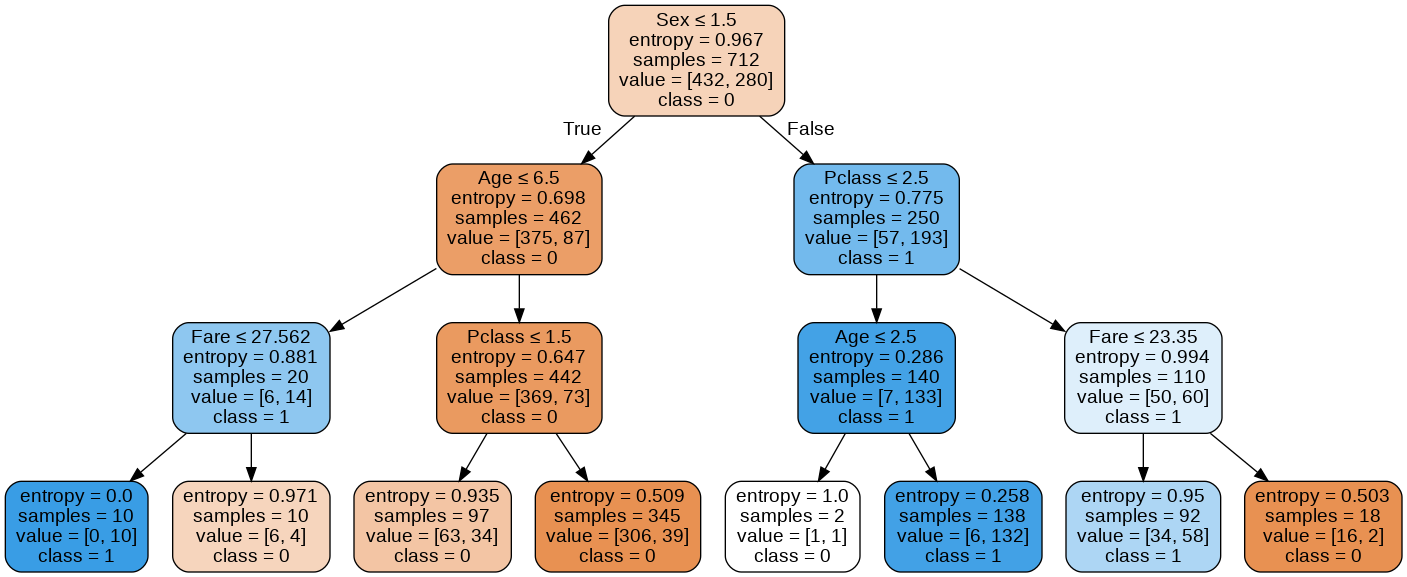

In [0]:
# visualize decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())